# 대중교통 데이터 분석

## 데이터 수집
---

1. 티미니 홈페이지로 진입 https://pay.tmoney.co.kr/index.dev
2. 이용안내 클릭
3. 대중교통 통계자료 클릭
4. 월간 교통카드 통계자료 파일 다운

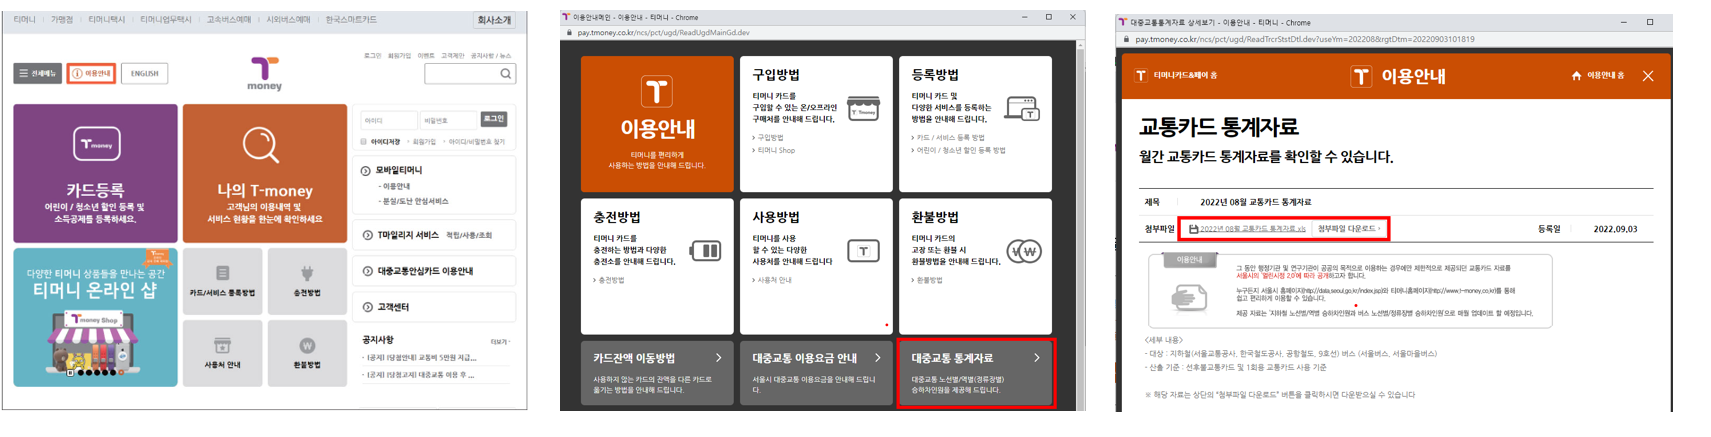

In [ ]:
# 여기에서는 수도권 대중교통 데이터로 프로젝트를 진행하지만 
# 각 지방자치단체에서도 대중교통 데이터를 제공할 경우에는 여러분이 원하는 지역에 대한 프로젝트도 해 볼 수 있습니다.

In [ ]:
# base64 : 범운영체제에서 모두 사용가능한 이미지 인코딩
# 윈도우, 맥 등 모두 이미지를 볼 수 있도록.

In [ ]:
# https://thebook.io/007029/part03/unit08/01/02/
# https://www.youtube.com/playlist?list=PLZOZh8ZFHaxAZAdCK_8Ae54upoYkWqB25

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/13.데이터분석

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 1. 데이터 확인
---

In [1]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#데이터 로드
# df = pd.read_csv('./data/2022년 08월  교통카드 통계자료.csv',encoding='cp949', thousands = ',')
# 엑셀에서 utf8.csv로 저장하기 기능을 사용한 경우 : 인코딩 명시하지 않아도 무방하다
df = pd.read_csv('./data/2022년 08월  교통카드 통계자료_utf8_excel.csv', thousands = ',')

In [ ]:
# 엑셀파일을 데이터 로드

In [42]:
%pip install xlrd


     ---------------------------------------- 96.5/96.5 kB 5.4 MB/s eta 0:00:00


In [51]:
xls_df = pd.read_excel('./data/subwayfee.xls', thousands = ',')
# xls_df = pd.read_excel('./data/subwayfee.xls', thousands = ',', sheet_name=2) # 사용할 시트 지정

In [47]:
xls_df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23
1,2022-08,1호선,151,시청,544893,557176,89898,88059,2022-09-03 10:18:23
2,2022-08,1호선,152,종각,854020,836751,133088,123352,2022-09-03 10:18:23
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23
4,2022-08,1호선,154,종로5가,378532,385585,238475,229206,2022-09-03 10:18:23


In [52]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23
1,2022-08,1호선,151,시청,544893,557176,89898,88059,2022-09-03 10:18:23
2,2022-08,1호선,152,종각,854020,836751,133088,123352,2022-09-03 10:18:23
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23
4,2022-08,1호선,154,종로5가,378532,385585,238475,229206,2022-09-03 10:18:23


In [48]:
df.info() # 사용월, 작업일시 string -> 날짜 사용시 datetime64변경해야함 # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


In [35]:
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,617.000000,6.170000e+02,6.170000e+02,617.000000,617.000000
mean,1928.145867,2.498817e+05,2.492992e+05,52280.401945,51740.601297
std,1205.032659,2.592505e+05,2.641137e+05,43689.330709,43510.255133
min,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1204.000000,8.235000e+04,7.733000e+04,21643.000000,21059.000000
50%,1846.000000,1.782060e+05,1.727850e+05,41384.000000,40539.000000
75%,2637.000000,3.294550e+05,3.360250e+05,67543.000000,66687.000000
max,4713.000000,2.073808e+06,2.018576e+06,277589.000000,282283.000000


In [49]:
df.isnull().sum()

사용월     0
호선명     0
역ID     0
지하철역    0
유임승차    0
유임하차    0
무임승차    0
무임하차    0
작업일시    0
dtype: int64

In [ ]:
# df['날짜'] = df['날짜'].astype('datetime64')
# df['년']= df['날짜'].dt.year
# df['월']= df['날짜'].dt.month
# df['일']= df['날짜'].dt.day

## 2. 유임 승차 비율이 가장 높은 역은 어디일까?
---
__유임 승차 비율이 가장 높은 역은 어디일까?__

이 질문을 해결하기 위한 알고리즘을 잠시 생각해보자. 

```
rate = 유임승차인원 / 무임승차인원
```

1. 데이터를 읽어온다.
2. 모든 역의 데이터를 바탕으로 각 역의 비율(rate)를 계산한다.
3. 비율이 가장 높은 역을 찿는다.
4. 비율이 가장 높은 역이 어디인지, 그 비율이 얼마인지 출력한다.

'''무임승차하는 만 65세 이상의 데이터를 의미'''

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


### EDA (탐색적 데이터 분석)

In [54]:
# 전반적인 정보,컬럼수, 행수,타입, 결측치 여부 파악 용도
df.info()
# df.isnull().sum()

# 사용월, 작업일시 string -> 날짜 사용시 datetime64변경해야함 # 결측치 없음
# df['사용월'] = df['사용월'].astype('datetime64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


In [55]:
#통계적 정보
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,617.000000,6.170000e+02,6.170000e+02,617.000000,617.000000
mean,1928.145867,2.498817e+05,2.492992e+05,52280.401945,51740.601297
std,1205.032659,2.592505e+05,2.641137e+05,43689.330709,43510.255133
min,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1204.000000,8.235000e+04,7.733000e+04,21643.000000,21059.000000
50%,1846.000000,1.782060e+05,1.727850e+05,41384.000000,40539.000000
75%,2637.000000,3.294550e+05,3.360250e+05,67543.000000,66687.000000
max,4713.000000,2.073808e+06,2.018576e+06,277589.000000,282283.000000


In [56]:
# 데이터 중복 확인
df['지하철역'].value_counts()

서울역               5
공덕                4
동대문역사문화공원(DDP)    3
고속터미널             3
홍대입구              3
                 ..
정왕                1
신길온천              1
안산                1
초지                1
관악산(서울대)          1
Name: 지하철역, Length: 526, dtype: int64

In [59]:
df['지하철역'] == '서울역'

0       True
1      False
2      False
3      False
4      False
       ...  
612    False
613    False
614    False
615    False
616    False
Name: 지하철역, Length: 617, dtype: bool

In [58]:
df[df['지하철역'] == '서울역']
# 호선이 다름. 중복 데이터가 아님 -> 지우면 안됨

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23
111,2022-08,4호선,426,서울역,270602,479888,35704,44605,2022-09-03 10:18:23
120,2022-08,경부선,1001,서울역,246839,70773,13293,2816,2022-09-03 10:18:23
326,2022-08,경의선,1291,서울역,98709,123369,14353,17548,2022-09-03 10:18:23
566,2022-08,공항철도 1호선,4201,서울역,261344,244162,31322,27197,2022-09-03 10:18:23


In [60]:
df[df['지하철역'] == '공덕']

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
327,2022-08,경의선,1292,공덕,92191,76493,13880,13352,2022-09-03 10:18:23
399,2022-08,5호선,2530,공덕,326425,349172,42094,39296,2022-09-03 10:18:23
452,2022-08,6호선,2627,공덕,416090,407757,68459,64286,2022-09-03 10:18:23
567,2022-08,공항철도 1호선,4202,공덕,61510,83324,7272,8759,2022-09-03 10:18:23


In [61]:
# 중복되는 것 빼고 전체 역 개수는 몇 개 일까? 
df['지하철역'].unique()

array(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동',
       '청량리(서울시립대입구)', '동묘앞', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원(DDP)',
       '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)',
       '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)',
       '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)',
       '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림',
       '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)',
       '용답', '신답', '도림천', '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발',
       '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁(정부서울청사)', '안국', '충무로',
       '동대입구', '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널',
       '남부터미널(예술의전당)', '양재(서초구청)', '매봉', '도곡', '대치', '학여울', '대청', '일원',
       '수서', '가락시장', '경찰병원', '오금', '당고개', '상계', '노원', '창동', '쌍문',
       '수유(강북구청)', '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)',
       '한성대입구(삼선교)', '혜화', '명동', '회현(남대문시장)', '숙대입구(갈월)', '삼각지', '신용산',
       '이촌(국립중앙박물관)', '동작(현충

In [64]:
len(df['지하철역'].unique())

526

In [65]:
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '5호선',
       '6호선', '7호선', '8호선', '9호선', '공항철도 1호선', '9호선2~3단계', '우이신설선', '신림선'],
      dtype=object)

In [66]:
len(df['호선명'].unique()) # 파이썬 내장함수 len()

26

In [70]:
type(df['호선명'].unique())
# count가 어트리뷰트에러가 나는 이유는 타입이 맞지않아서. ->  타입 체크로 확인

numpy.ndarray

In [68]:
df['호선명'].unique().size # numpy 타입에 사용하는 size

26

In [69]:
df['호선명'].unique().shape

(26,)

In [ ]:
#데이터 카테고리 수


In [ ]:
#서울역이 왜 여러개지?
#데이터를 봐야겠다


In [ ]:
#지하철역 개수


In [ ]:
#호선명 개수


## 유임승차 비율 구하기

In [71]:
# 특수문자 제거해 타입변경 => thousands = ',' 안하면 타입에러

df['유임승차'] / (df['유임승차'] + df['무임승차'])

0      0.866033
1      0.858382
2      0.865174
3      0.608373
4      0.613497
         ...   
612    0.732929
613    0.698681
614    0.759355
615    0.733135
616    0.561216
Length: 617, dtype: float64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


In [73]:
#유임승차비율 컬럼 새로 만들기
df['유임승차비율'] = df['유임승차'] / (df['유임승차'] + df['무임승차'])

In [76]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23,0.866033
1,2022-08,1호선,151,시청,544893,557176,89898,88059,2022-09-03 10:18:23,0.858382
2,2022-08,1호선,152,종각,854020,836751,133088,123352,2022-09-03 10:18:23,0.865174
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23,0.608373
4,2022-08,1호선,154,종로5가,378532,385585,238475,229206,2022-09-03 10:18:23,0.613497


In [78]:
#유임승차 비율이 높은순대로 정렬 (내림차순)
df.sort_values(by=['유임승차비율'], ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
237,2022-08,분당선,1031,복정,13,0,0,0,2022-09-03 10:18:23,1.000000
192,2022-08,경원선,1022,창동,10,0,0,0,2022-09-03 10:18:23,1.000000
521,2022-08,7호선,2760,굴포천,2,0,0,0,2022-09-03 10:18:23,1.000000
522,2022-08,7호선,2761,부평구청,3,0,0,0,2022-09-03 10:18:23,1.000000
519,2022-08,7호선,2758,상동,2,0,0,0,2022-09-03 10:18:23,1.000000
...,...,...,...,...,...,...,...,...,...,...
295,2022-08,중앙선,1219,용문,33480,33582,37976,37890,2022-09-03 10:18:23,0.468540
9,2022-08,1호선,159,동묘앞,116233,122982,133024,134234,2022-09-03 10:18:23,0.466318
296,2022-08,중앙선,1220,지평,943,1034,1130,1107,2022-09-03 10:18:23,0.454896
7,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23,0.452854


> * 무임승차가 0인 겨우 유임승차비율이 1로 나타납니다. 
> * 무임승차가 0이 아닌 경우로 한정해서 다시 정렬해야할 것 같습니다. 

In [81]:
df['무임승차'] != 0 

0      True
1      True
2      True
3      True
4      True
       ... 
612    True
613    True
614    True
615    True
616    True
Name: 무임승차, Length: 617, dtype: bool

In [82]:
df['무임승차'] > 0 

0      True
1      True
2      True
3      True
4      True
       ... 
612    True
613    True
614    True
615    True
616    True
Name: 무임승차, Length: 617, dtype: bool

In [83]:
df[df['무임승차'] > 0 ]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23,0.866033
1,2022-08,1호선,151,시청,544893,557176,89898,88059,2022-09-03 10:18:23,0.858382
2,2022-08,1호선,152,종각,854020,836751,133088,123352,2022-09-03 10:18:23,0.865174
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23,0.608373
4,2022-08,1호선,154,종로5가,378532,385585,238475,229206,2022-09-03 10:18:23,0.613497
...,...,...,...,...,...,...,...,...,...,...
612,2022-08,신림선,4407,당곡,77486,75161,28235,27946,2022-09-03 10:18:23,0.732929
613,2022-08,신림선,4408,신림,32147,46702,13864,16042,2022-09-03 10:18:23,0.698681
614,2022-08,신림선,4409,서원,61687,52487,19549,19097,2022-09-03 10:18:23,0.759355
615,2022-08,신림선,4410,서울대벤처타운,137800,134489,50160,51435,2022-09-03 10:18:23,0.733135


In [84]:
df[df['무임승차'] > 0 ].sort_values(by='유임승차비율',ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
440,2022-08,6호선,2615,연신내,52,0,2,0,2022-09-03 10:18:23,0.962963
568,2022-08,공항철도 1호선,4203,홍대입구,334381,344582,17164,16166,2022-09-03 10:18:23,0.951176
48,2022-08,2호선,239,홍대입구,1717050,1851268,90063,86905,2022-09-03 10:18:23,0.950162
120,2022-08,경부선,1001,서울역,246839,70773,13293,2816,2022-09-03 10:18:23,0.948899
570,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283,206531,12852,12660,2022-09-03 10:18:23,0.943911
...,...,...,...,...,...,...,...,...,...,...
295,2022-08,중앙선,1219,용문,33480,33582,37976,37890,2022-09-03 10:18:23,0.468540
9,2022-08,1호선,159,동묘앞,116233,122982,133024,134234,2022-09-03 10:18:23,0.466318
296,2022-08,중앙선,1220,지평,943,1034,1130,1107,2022-09-03 10:18:23,0.454896
7,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23,0.452854


In [ ]:
# min, max구해서 25퍼 이상에서 구하자. 등의 기준을 정하는것은
#  도메인에 대한 이해를 바탕으로 정하라

> * 유동인구 자체가 적은 역이 유임승차비율이 높은것으로 나타납니다. 
> * 유동인구가 많은 역을 대상으로 분석해야 할 것 같습니다. 

In [88]:
#유임승차와 무임승차를 모두 합해서 10만명을 초과하는 역만 대상
# 필터 완료한 데이터프레임 카피
df_10 = df[(df['유임승차'] + df['무임승차']) > 100000 ]
df_10


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,1호선,150,서울역,1167657,1130901,180626,172177,2022-09-03 10:18:23,0.866033
1,2022-08,1호선,151,시청,544893,557176,89898,88059,2022-09-03 10:18:23,0.858382
2,2022-08,1호선,152,종각,854020,836751,133088,123352,2022-09-03 10:18:23,0.865174
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23,0.608373
4,2022-08,1호선,154,종로5가,378532,385585,238475,229206,2022-09-03 10:18:23,0.613497
...,...,...,...,...,...,...,...,...,...,...
601,2022-08,우이신설선,4709,북한산보국문,123458,112556,38929,39158,2022-09-03 10:18:23,0.760270
602,2022-08,우이신설선,4710,정릉,83670,72964,43097,39857,2022-09-03 10:18:23,0.660030
611,2022-08,신림선,4406,보라매병원,127644,135081,40384,39080,2022-09-03 10:18:23,0.759659
612,2022-08,신림선,4407,당곡,77486,75161,28235,27946,2022-09-03 10:18:23,0.732929


In [17]:
df_10 = df_10.sort_values(by='유임승차비율', ascending=False) 
df_10.head(10) # 상위 10개 데이터만 

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
568,2022-08,공항철도 1호선,4203,홍대입구,334381,344582,17164,16166,2022-09-03 10:18:23,0.951176
48,2022-08,2호선,239,홍대입구,1717050,1851268,90063,86905,2022-09-03 10:18:23,0.950162
120,2022-08,경부선,1001,서울역,246839,70773,13293,2816,2022-09-03 10:18:23,0.948899
570,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283,206531,12852,12660,2022-09-03 10:18:23,0.943911
565,2022-08,9호선,4125,신논현,790971,787147,48569,46859,2022-09-03 10:18:23,0.942148
555,2022-08,9호선,4115,여의도,721152,680330,46281,42069,2022-09-03 10:18:23,0.939694
457,2022-08,6호선,2632,한강진,224575,266059,14949,14544,2022-09-03 10:18:23,0.937589
571,2022-08,공항철도 1호선,4207,김포공항,337165,182448,22741,14639,2022-09-03 10:18:23,0.936814
18,2022-08,2호선,209,한양대,177378,188876,11994,12537,2022-09-03 10:18:23,0.936664
31,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23,0.934026


> * 한양대, 홍대입구 같은 대학 근처 역과 
> * 서울이나 논현,강남과 같은 사람들이 많이 다니는 곳의 유임승차 비율이 높은 것 같습니다. 

In [18]:
line = df_10.loc[568,'호선명']
subname = df_10.loc[568,'지하철역']
rate = df_10.loc[568,'유임승차비율']

print('유임 승차 비율이 가장 높은 역은? {} {} {:.2f}%'.format(subname,line,rate*100))

유임 승차 비율이 가장 높은 역은? 홍대입구 공항철도 1호선 95.12%


In [19]:
df_10 = df_10.reset_index(drop=True) # 인덱스 재라벨링 # drop=True : 기존 인덱스가 컬럼이 되는 것을 삭제
df_10

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,공항철도 1호선,4203,홍대입구,334381,344582,17164,16166,2022-09-03 10:18:23,0.951176
1,2022-08,2호선,239,홍대입구,1717050,1851268,90063,86905,2022-09-03 10:18:23,0.950162
2,2022-08,경부선,1001,서울역,246839,70773,13293,2816,2022-09-03 10:18:23,0.948899
3,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283,206531,12852,12660,2022-09-03 10:18:23,0.943911
4,2022-08,9호선,4125,신논현,790971,787147,48569,46859,2022-09-03 10:18:23,0.942148
5,2022-08,9호선,4115,여의도,721152,680330,46281,42069,2022-09-03 10:18:23,0.939694
6,2022-08,6호선,2632,한강진,224575,266059,14949,14544,2022-09-03 10:18:23,0.937589
7,2022-08,공항철도 1호선,4207,김포공항,337165,182448,22741,14639,2022-09-03 10:18:23,0.936814
8,2022-08,2호선,209,한양대,177378,188876,11994,12537,2022-09-03 10:18:23,0.936664
9,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23,0.934026


In [20]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
rate = df_10.iloc[0,-1]
print('유임 승차 비율이 가장 높은 역은? {} {} {:.2f}%'.format(subname,line,rate*100))

유임 승차 비율이 가장 높은 역은? 홍대입구 공항철도 1호선 95.12%


In [22]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
rate = df_10.iloc[0,9]

print('유임 승차 비율이 가장 높은 역은? {} {} {:.2f}%'.format(subname,line,rate*100))

유임 승차 비율이 가장 높은 역은? 홍대입구 공항철도 1호선 95.12%


In [44]:
df_10['유임승차'].max()

2073808

---

## 3. 유무임 승하차 인원이 가장 많은 역은 어디일까?
---
__유무임 승하차 인원이 가장 많은 역은 어디일까?__

유임 승차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾으면 되니까 다음과 같은 간단한 알고리즘을 생각할 수 있다.

1. 데이터를 읽어온다
2. 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.
3. 각각의 인원이 가장 많은 역을 출력한다.

In [34]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
df = pd.read_csv('./data/2022년 08월  교통카드 통계자료_utf8_excel.csv', thousands = ',')

#데이터 전처리

#유임승차비율 컬럼 새로 만들기
df['유임승차비율'] = df['유임승차'] / (df['유임승차'] + df['무임승차'])

#유임승차와 무임승차를 모두 합해서 10만명을 초과하는 역만 대상
#필터 완료한 데이터프레임 카피
df_10 = df[(df['유임승차'] + df['무임승차']) > 100000 ]

# 정렬
# df_10 = df_10.sort_values(by='유임승차비율', ascending=False) 
# df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬

# 원하는 데이터 select해서 출력
# line = df_10.loc[568,'호선명']
# subname = df_10.loc[568,'지하철역']
# rate = df_10.loc[568,'유임승차비율']

# line = df_10.iloc[0,1]
# subname = df_10.iloc[0,3]
# rate = df_10.iloc[0,-1]

# print('유임 승차 비율이 가장 높은 역은? {} {} {:.2f}%'.format(subname,line,rate*100))

In [ ]:
# [실습] 

#유임승차가 가장 많은 역

#유임하차가 가장 많은 역

#무임승차가 가장 많은 역

#무임하차가 가장 많은 역


In [35]:
#유임승차가 가장 많은 역
df_10.sort_values(by='유임승차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
31,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23,0.934026


In [97]:
line = df_10.loc[31,'호선명']
subname = df_10.loc[31,'지하철역']
num = df_10.loc[31,'유임승차']

print(f'유임승차 : {line} {subname} {num}')

유임승차 : 2호선 강남 2073808


In [36]:
line = df_10.iloc[31,1]
subname = df_10.iloc[31,3]
num = df_10.iloc[31,4]

print(f'유임승차 : {line} {subname} {num}')

유임승차 : 2호선 강남 2073808


In [37]:
#유임하차가 가장 많은 역
df_10.sort_values(by='유임하차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
31,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23,0.934026


In [101]:
line = df_10.loc[31,'호선명']
subname = df_10.loc[31,'지하철역']
num = df_10.loc[31,'유임하차']

print(f'유임하차 : {line} {subname} {num}')

유임하차 : 2호선 강남 2018576


In [38]:
line = df_10.iloc[31,1]
subname = df_10.iloc[31,3]
num = df_10.iloc[31,5]

print(f'유임하차 : {line} {subname} {num}')

유임하차 : 2호선 강남 2018576


In [39]:
#무임승차가 가장 많은 역
df_10.sort_values(by='무임승차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23,0.608373


In [102]:
line = df_10.loc[3,'호선명']
subname = df_10.loc[3,'지하철역']
num = df_10.loc[3,'무임승차']

print(f'무임승차 : {line} {subname} {num}')

무임승차 : 1호선 종로3가 277589


In [41]:
line = df_10.iloc[3,1]
subname = df_10.iloc[3,3]
num = df_10.iloc[3,6]

print(f'무임승차 : {line} {subname} {num}')

무임승차 : 1호선 종로3가 277589


In [42]:
#무임하차가 가장 많은 역
df_10.sort_values(by='무임하차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
7,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23,0.452854


In [104]:
line = df_10.loc[7,'호선명']
subname = df_10.loc[7,'지하철역']
num = df_10.loc[7,'무임하차']

print(f'무임하차 : {line} {subname} {num}')

무임하차 : 1호선 제기동 282283


In [43]:
line = df_10.iloc[7,1]
subname = df_10.iloc[7,3]
num = df_10.iloc[7,7]

print(f'무임하차 : {line} {subname} {num}')

무임하차 : 1호선 제기동 282283


```
아래와 같이 분석 결과를 출력해 봅시다

유임승차 : 2호선 강남 2073808
유임하차 : 2호선 강남 2018576
무임승차 : 1호선 종로3가 277589
무임하차 : 1호선 제기동 282283

```

In [ ]:
# [실습] 

#유임승차가 가장 많은 역

#유임하차가 가장 많은 역

#무임승차가 가장 많은 역

#무임하차가 가장 많은 역


In [24]:
# [실습] 

#유임승차가 가장 많은 역

#유임하차가 가장 많은 역

#무임승차가 가장 많은 역

#무임하차가 가장 많은 역

In [52]:
#데이터 로드
df = pd.read_csv('./data/2022년 08월  교통카드 통계자료_utf8_excel.csv', thousands = ',')

In [53]:
charged_1= df.sort_values(by='유임승차', ascending=False).iloc[0,[1,3,4]]
charged_0= df.sort_values(by='유임하차', ascending=False).iloc[0,[1,3,5]]
nocharged_1= df.sort_values(by='무임승차', ascending=False).iloc[0,[1,3,6]]
nocharged_0= df.sort_values(by='무임하차', ascending=False).iloc[0,[1,3,7]]

In [48]:
charged_1[0], charged_1[1], charged_1[2]

('2호선', '강남', 2073808)

In [60]:
df.sort_values(by='유임승차',ascending=True).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
520,2022-08,7호선,2759,삼산체육관,1,0,0,0,2022-09-03 10:18:23
517,2022-08,7호선,2753,까치울,1,0,1,0,2022-09-03 10:18:23
518,2022-08,7호선,2756,신중동,1,0,0,0,2022-09-03 10:18:23
521,2022-08,7호선,2760,굴포천,2,0,0,0,2022-09-03 10:18:23
519,2022-08,7호선,2758,상동,2,0,0,0,2022-09-03 10:18:23


In [58]:
df.sort_values(by=['유임승차','유임하차'], ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
31,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23
25,2022-08,2호선,216,잠실(송파구청),1935140,1906432,183233,174997,2022-09-03 10:18:23
48,2022-08,2호선,239,홍대입구,1717050,1851268,90063,86905,2022-09-03 10:18:23
39,2022-08,2호선,230,신림,1428420,1365194,193960,193975,2022-09-03 10:18:23
41,2022-08,2호선,232,구로디지털단지,1395053,1391260,161275,162548,2022-09-03 10:18:23


In [61]:
df['유임승하차'] = df['유임승차']+df['유임하차']
df.sort_values(by='유임승하차', ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승하차
31,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23,4092384
25,2022-08,2호선,216,잠실(송파구청),1935140,1906432,183233,174997,2022-09-03 10:18:23,3841572
48,2022-08,2호선,239,홍대입구,1717050,1851268,90063,86905,2022-09-03 10:18:23,3568318
39,2022-08,2호선,230,신림,1428420,1365194,193960,193975,2022-09-03 10:18:23,2793614
41,2022-08,2호선,232,구로디지털단지,1395053,1391260,161275,162548,2022-09-03 10:18:23,2786313


In [56]:
df.sort_values(by='무임승차', ascending=False).tail()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
192,2022-08,경원선,1022,창동,10,0,0,0,2022-09-03 10:18:23
518,2022-08,7호선,2756,신중동,1,0,0,0,2022-09-03 10:18:23
519,2022-08,7호선,2758,상동,2,0,0,0,2022-09-03 10:18:23
520,2022-08,7호선,2759,삼산체육관,1,0,0,0,2022-09-03 10:18:23
237,2022-08,분당선,1031,복정,13,0,0,0,2022-09-03 10:18:23


In [57]:
df.sort_values(by='무임승차', ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
3,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23
7,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23
8,2022-08,1호선,158,청량리(서울시립대입구),314838,313155,246473,249786,2022-09-03 10:18:23
62,2022-08,3호선,311,연신내,754025,707293,241527,233167,2022-09-03 10:18:23
125,2022-08,경부선,1006,영등포,938627,970940,241269,241727,2022-09-03 10:18:23


In [ ]:
#유임승차가 가장 많은 역
print(f'유임승차 : {line} {subname} {num}')
#유임하차가 가장 많은 역

#무임승차가 가장 많은 역

#무임하차가 가장 많은 역

In [23]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
df = pd.read_csv('./data/2022년 08월  교통카드 통계자료_utf8_excel.csv', thousands = ',')

#데이터 전처리

#유임승차비율 컬럼 새로 만들기
df['유임승차비율'] = df['유임승차'] / (df['유임승차'] + df['무임승차'])

#유임승차와 무임승차를 모두 합해서 10만명을 초과하는 역만 대상
#필터 완료한 데이터프레임 카피
df_10 = df[(df['유임승차'] + df['무임승차']) > 100000 ]


In [51]:
#유임승차가 가장 많은 역
df_10 = df_10.sort_values(by='유임승차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df.tail(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
616,2022-08,신림선,4411,관악산(서울대),51376,52116,40168,39712,2022-09-03 10:18:23,0.561216


In [50]:
df.tail(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
616,2022-08,신림선,4411,관악산(서울대),51376,52116,40168,39712,2022-09-03 10:18:23,0.561216


In [27]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
num = df_10.iloc[0,4]

print(f'유임승차 : {line} {subname} {num}')

유임승차 : 2호선 강남 2073808


In [28]:
#유임하차가 가장 많은 역
df_10 = df_10.sort_values(by='유임하차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df_10.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,2호선,222,강남,2073808,2018576,146482,127762,2022-09-03 10:18:23,0.934026


In [29]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
num = df_10.iloc[0,5]

print(f'유임하차 : {line} {subname} {num}')

유임하차 : 2호선 강남 2018576


In [30]:
#무임승차가 가장 많은 역
df_10 = df_10.sort_values(by='무임승차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df_10.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,1호선,153,종로3가,431220,393760,277589,261412,2022-09-03 10:18:23,0.608373


In [31]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
num = df_10.iloc[0,6]

print(f'무임승차 : {line} {subname} {num}')

무임승차 : 1호선 종로3가 277589


In [32]:
#무임하차가 가장 많은 역
df_10 = df_10.sort_values(by='무임하차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df_10.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,1호선,157,제기동,216929,208260,262097,282283,2022-09-03 10:18:23,0.452854


In [33]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
num = df_10.iloc[0,7]

print(f'무임하차 : {line} {subname} {num}')

무임하차 : 1호선 제기동 282283


In [ ]:
# 데이터 추출 게임
#유임승차가 가장 많은 역

#유임하차가 가장 많은 역

#무임승차가 가장 많은 역

#무임하차가 가장 많은 역

In [ ]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
df = pd.read_csv('./data/2022년 08월  교통카드 통계자료_utf8_excel.csv', thousands = ',')

#데이터 전처리

#유임승차비율 컬럼 새로 만들기
df['유임승차비율'] = df['유임승차'] / (df['유임승차'] + df['무임승차'])

#유임승차와 무임승차를 모두 합해서 10만명을 초과하는 역만 대상
#필터 완료한 데이터프레임 카피
df_10 = df[(df['유임승차'] + df['무임승차']) > 100000 ]

In [ ]:
#유임승차가 가장 많은 역
df_10.sort_values(by='유임승차', ascending=False).head()

In [ ]:
#유임하차가 가장 많은 역
df_10.sort_values(by='유임하차', ascending=False).head()

In [ ]:
#무임승차가 가장 많은 역
df_10.sort_values(by='무임승차', ascending=False).head()

In [ ]:
#무임하차가 가장 많은 역
df_10.sort_values(by='무임하차', ascending=False).head()

In [ ]:
line = df_10.iloc[31,1]
subname = df_10.iloc[31,3]
num = df_10.iloc[31,4]

print(f'유임승차 : {line} {subname} {num}')

In [ ]:
#유임승차가 가장 많은 역
df_10 = df_10.sort_values(by='유임승차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df_10.head(1)

In [ ]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
num = df_10.iloc[0,4]

print(f'유임승차 : {line} {subname} {num}')

In [ ]:
#유임하차가 가장 많은 역
df_10 = df_10.sort_values(by='유임하차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df_10.head(1)

In [ ]:
#무임승차가 가장 많은 역
df_10 = df_10.sort_values(by='무임승차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df_10.head(1)

In [ ]:
#무임하차가 가장 많은 역
df_10 = df_10.sort_values(by='무임하차', ascending=False)
df_10 = df_10.reset_index(drop=True) # 인덱스 새로 정렬
df_10.head(1)

## 모든 역의 유무임 승하차 비율은 어떻게 될까
---
이번에는 데이터가 있는 모든 역에 대한 유무임 승하차 비율을 표현해보자.

In [62]:
#라이브러리 로드
import pandas as pd

#데이터 로드
df = pd.read_csv('./data/2022년 08월  교통카드 통계자료_utf8_excel.csv', thousands = ',')


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


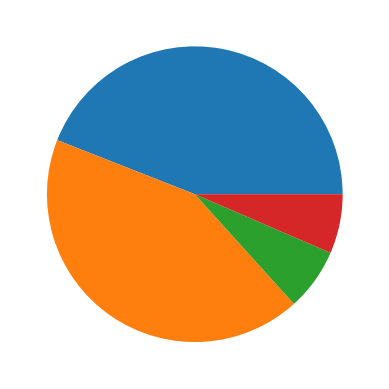

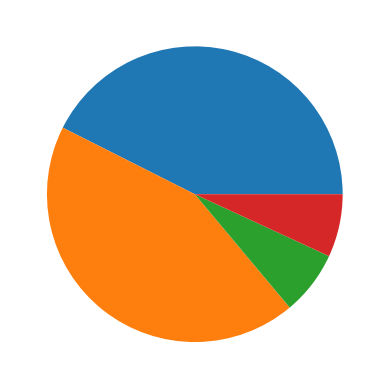

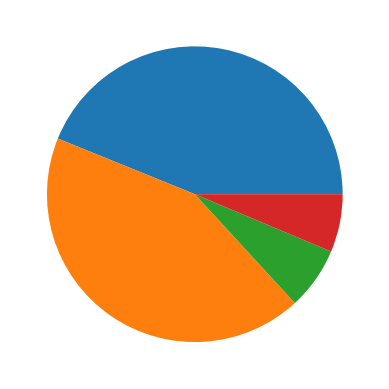

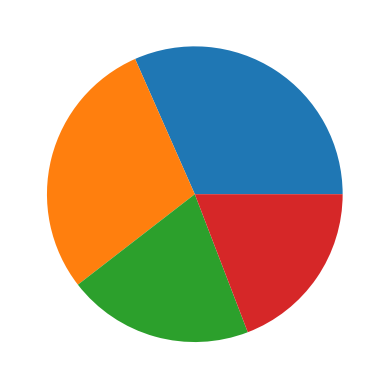

In [64]:
import matplotlib.pyplot as plt
for i,row in enumerate(df.values):
    plt.pie(row[4:8]) # 유무임 승하차 비율 슬라이싱
    plt.show()
    if i ==3: break # 일단 4개만 출력

In [ ]:
# 파이차트 그리기
# 각 역마다 유무임 승하차 비율 시각화


```
**코드는 어떻게 보완하면 좋을까?**

1. 어떤 역에 대한 차트인지 정보가 부족하다.
2. 비율을 수치로 정확하게 나타내면 좋겠다.
3. 색상을 좀 더 예쁘게 바꾸고 싶을 수 있다.
```

In [ ]:
# plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
# #plt.rc('font', family='AppleGothic')     #맥
# plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

In [69]:
for i,row in enumerate(df.values):
    print(i,row)

0 ['2022-08' '1호선' 150 '서울역' 1167657 1130901 180626 172177
 '2022-09-03 10:18:23']
1 ['2022-08' '1호선' 151 '시청' 544893 557176 89898 88059 '2022-09-03 10:18:23']
2 ['2022-08' '1호선' 152 '종각' 854020 836751 133088 123352
 '2022-09-03 10:18:23']
3 ['2022-08' '1호선' 153 '종로3가' 431220 393760 277589 261412
 '2022-09-03 10:18:23']
4 ['2022-08' '1호선' 154 '종로5가' 378532 385585 238475 229206
 '2022-09-03 10:18:23']
5 ['2022-08' '1호선' 155 '동대문' 201515 185040 108071 107241
 '2022-09-03 10:18:23']
6 ['2022-08' '1호선' 156 '신설동' 253890 248567 109470 105967
 '2022-09-03 10:18:23']
7 ['2022-08' '1호선' 157 '제기동' 216929 208260 262097 282283
 '2022-09-03 10:18:23']
8 ['2022-08' '1호선' 158 '청량리(서울시립대입구)' 314838 313155 246473 249786
 '2022-09-03 10:18:23']
9 ['2022-08' '1호선' 159 '동묘앞' 116233 122982 133024 134234
 '2022-09-03 10:18:23']
10 ['2022-08' '2호선' 201 '시청' 568964 547537 51980 47237 '2022-09-03 10:18:23']
11 ['2022-08' '2호선' 202 '을지로입구' 1030364 1059452 91971 85574
 '2022-09-03 10:18:23']
12 ['2022-08' '2호선' 

In [73]:
df.values

array([['2022-08', '1호선', 150, ..., 180626, 172177,
        '2022-09-03 10:18:23'],
       ['2022-08', '1호선', 151, ..., 89898, 88059, '2022-09-03 10:18:23'],
       ['2022-08', '1호선', 152, ..., 133088, 123352,
        '2022-09-03 10:18:23'],
       ...,
       ['2022-08', '신림선', 4409, ..., 19549, 19097, '2022-09-03 10:18:23'],
       ['2022-08', '신림선', 4410, ..., 50160, 51435, '2022-09-03 10:18:23'],
       ['2022-08', '신림선', 4411, ..., 40168, 39712, '2022-09-03 10:18:23']],
      dtype=object)

In [74]:
type(row)

numpy.ndarray

In [75]:
len(row)

9

In [70]:
row[1]

'신림선'

In [76]:
row[0]

'2022-08'

In [77]:
row[-1]

'2022-09-03 10:18:23'

In [82]:
row[3]

'관악산(서울대)'

In [91]:
for i,row in enumerate(df.values):
    print(i, row[1], row[3])

0 1호선 서울역
1 1호선 시청
2 1호선 종각
3 1호선 종로3가
4 1호선 종로5가
5 1호선 동대문
6 1호선 신설동
7 1호선 제기동
8 1호선 청량리(서울시립대입구)
9 1호선 동묘앞
10 2호선 시청
11 2호선 을지로입구
12 2호선 을지로3가
13 2호선 을지로4가
14 2호선 동대문역사문화공원(DDP)
15 2호선 신당
16 2호선 상왕십리
17 2호선 왕십리(성동구청)
18 2호선 한양대
19 2호선 뚝섬
20 2호선 성수
21 2호선 건대입구
22 2호선 구의(광진구청)
23 2호선 강변(동서울터미널)
24 2호선 잠실나루
25 2호선 잠실(송파구청)
26 2호선 잠실새내
27 2호선 종합운동장
28 2호선 삼성(무역센터)
29 2호선 선릉
30 2호선 역삼
31 2호선 강남
32 2호선 교대(법원.검찰청)
33 2호선 서초
34 2호선 방배
35 2호선 사당
36 2호선 낙성대(강감찬)
37 2호선 서울대입구(관악구청)
38 2호선 봉천
39 2호선 신림
40 2호선 신대방
41 2호선 구로디지털단지
42 2호선 대림(구로구청)
43 2호선 신도림
44 2호선 문래
45 2호선 영등포구청
46 2호선 당산
47 2호선 합정
48 2호선 홍대입구
49 2호선 신촌
50 2호선 이대
51 2호선 아현
52 2호선 충정로(경기대입구)
53 2호선 용답
54 2호선 신답
55 2호선 신설동
56 2호선 도림천
57 2호선 양천구청
58 2호선 신정네거리
59 2호선 용두(동대문구청)
60 3호선 지축
61 3호선 구파발
62 3호선 연신내
63 3호선 불광
64 3호선 녹번
65 3호선 홍제
66 3호선 무악재
67 3호선 독립문
68 3호선 경복궁(정부서울청사)
69 3호선 안국
70 3호선 종로3가
71 3호선 을지로3가
72 3호선 충무로
73 3호선 동대입구
74 3호선 약수
75 3호선 금호
76 3호선 옥수
77 3호선 압구정
78 3호선 신사
79 3호선 잠원
80 3호선 고속터미널
81 3호선 교대(법원.검찰청)
82 3호선 남부

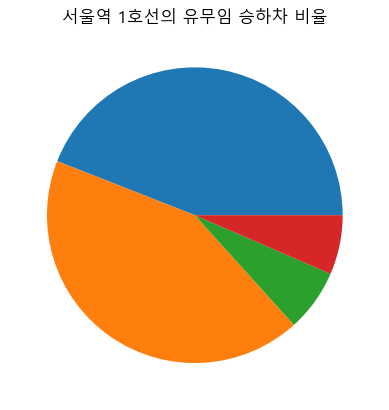

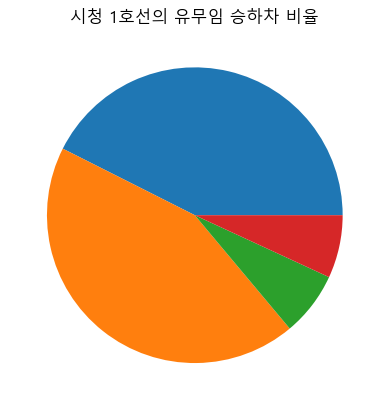

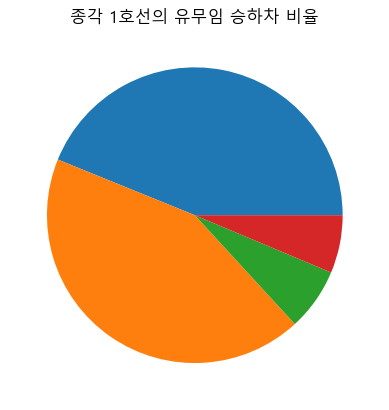

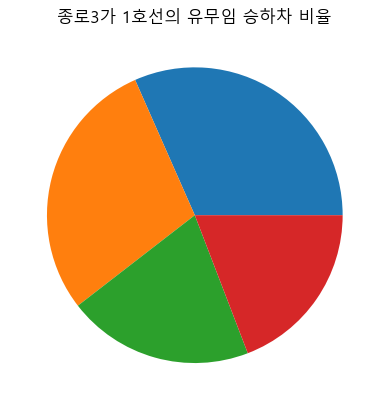

In [100]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
plt.rcParams['axes.unicode_minus']=False 


for i,row in enumerate(df.values):
    plt.pie(row[4:8]) # 유무임 승하차 비율 슬라이싱
    plt.title(f'{row[3]} {row[1]}의 유무임 승하차 비율')
    plt.show()
    if i ==3: break # 일단 4개만 출력

    label = ['유임승차','유임하차','무임승차','무임하차']

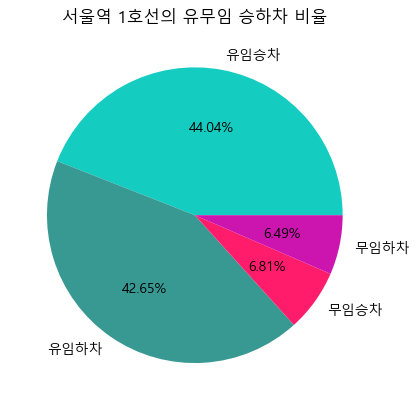

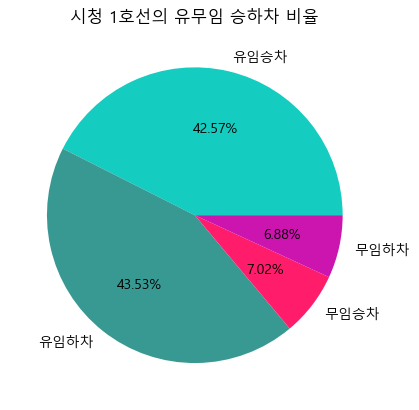

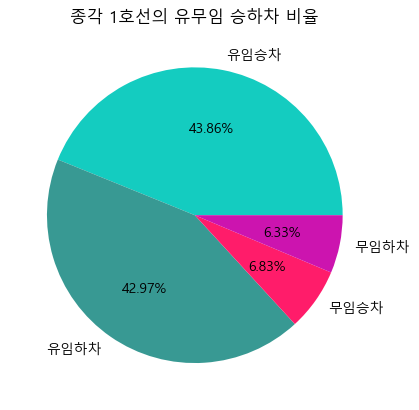

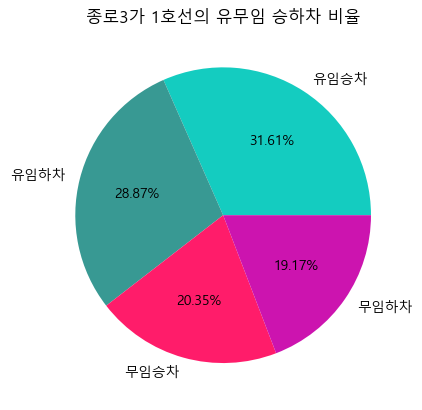

In [103]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
plt.rcParams['axes.unicode_minus']=False 

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
label = ['유임승차','유임하차','무임승차','무임하차']

for i,row in enumerate(df.values):
    plt.pie(row[4:8], labels=label, autopct='%.2f%%',colors=c ) # 유무임 승하차 비율 슬라이싱
    # plt.pie(row[4:8], labels=['유임승차','유임하차','무임승차','무임하차'], autopct='%.2f%%')
    plt.title(f'{row[3]} {row[1]}의 유무임 승하차 비율')
    plt.show()
    if i ==3: break # 일단 4개만 출력
    
    

```
마지막으로 시각화한 자료를 이미지 파일로 저장하자. 
그래프를 이미지로 저장하려면 `savefig()` 함수를 사용하면 된다.
```

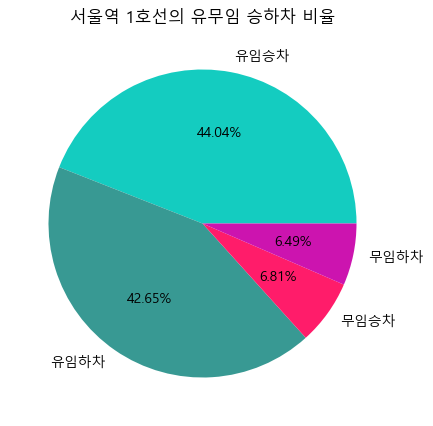

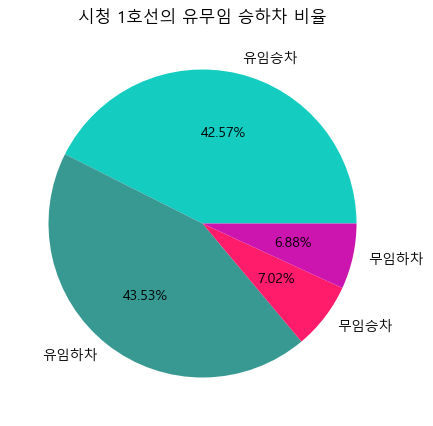

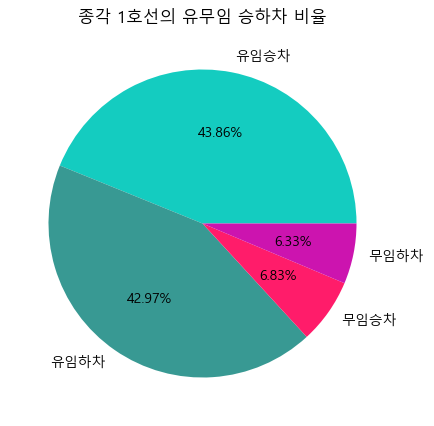

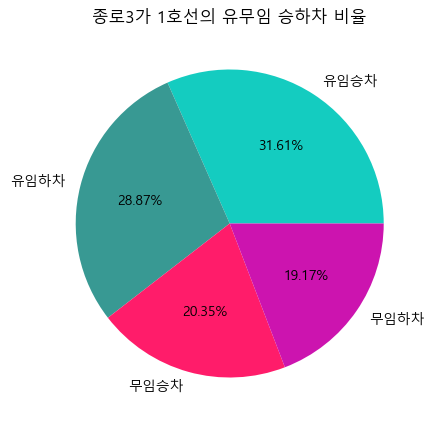

In [112]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
plt.rcParams['axes.unicode_minus']=False 

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
label = ['유임승차','유임하차','무임승차','무임하차']

for i,row in enumerate(df.values):
    plt.figure(figsize=(5,5)) # 여러개 적용되어야하기때문에 for문 안에 넣어야 모두 적용
    plt.pie(row[4:8], labels=label, autopct='%.2f%%',colors=c ) # 유무임 승하차 비율 슬라이싱
    # plt.pie(row[4:8], labels=['유임승차','유임하차','무임승차','무임하차'], autopct='%.2f%%')
    plt.title(f'{row[3]} {row[1]}의 유무임 승하차 비율')
    plt.show()
    if i ==3: break # 일단 4개만 출력


    

## 4. 그래프를 여러개 그리기

In [ ]:
plt.savefig('/content/drive/MyDrive/Dev_work/image/' + f'{row[3]}{row[1]}.png')

# 코랩
sdir = '/content/drive/MyDrive/Dev_work/image/'
plt.savefig(f'{sdir}{row[3]}{row[1]}.png')

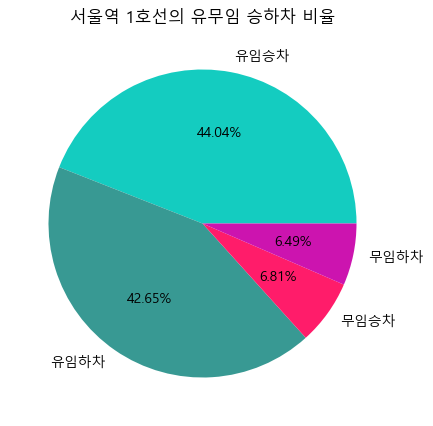

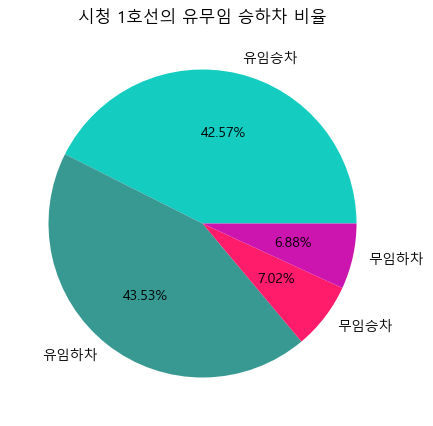

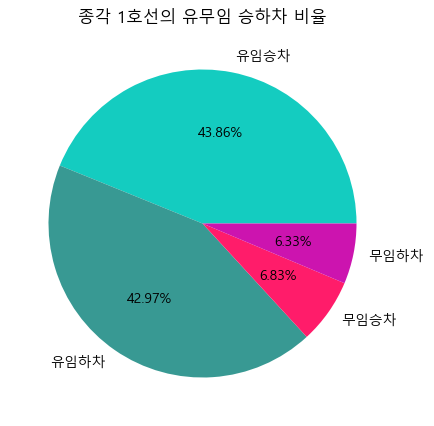

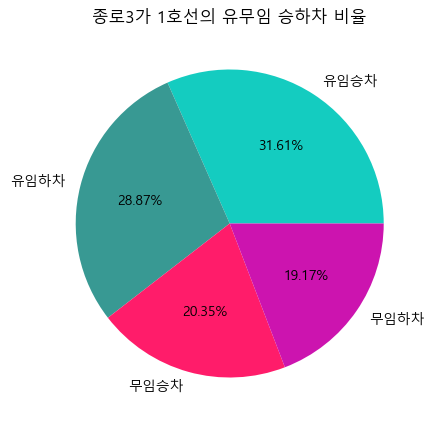

In [129]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
plt.rcParams['axes.unicode_minus']=False 

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
label = ['유임승차','유임하차','무임승차','무임하차']

for i,row in enumerate(df.values):
    plt.figure(figsize=(5,5)) # 여러개 적용되어야하기때문에 for문 안에 넣어야 모두 적용
    plt.pie(row[4:8], labels=label, autopct='%.2f%%',colors=c ) # 유무임 승하차 비율 슬라이싱
    plt.title(f'{row[3]} {row[1]}의 유무임 승하차 비율')
    # plt.savefig(f'../python/image/piechart{i+1}.png')
    # plt.savefig('./image/{0}{1}.png'.format(row[3],row[1]))
    plt.savefig(f'./image/{row[3]}_{row[1]}_유무임승하차비율.png')
    plt.show()
    if i ==3: break # 일단 4개만 출력



In [ ]:
# 종로 3가의 무임승하차 비율이 높은 것으로 보아 연령대가 높은 지역으로 추정된다.

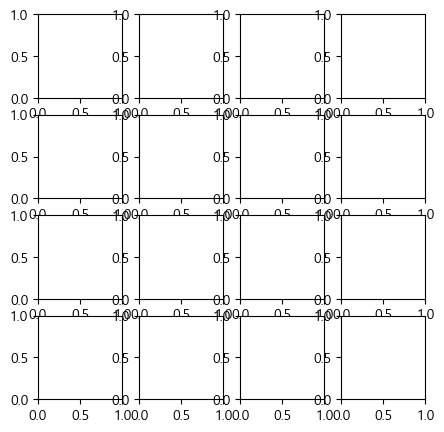

In [138]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
plt.rcParams['axes.unicode_minus']=False 

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
label = ['유임승차','유임하차','무임승차','무임하차']

plt.figure(figsize=(5,5))

for i,row in enumerate(df.values):

    # plt.subplot(가로수,세로수, 나는 어디?)
    # plt.subplot(2, 2, i+1) 
    # plt.subplot(3, 3, i+1) 
    plt.subplot(4, 4, i+1) 

    # plt.pie(row[4:8], labels=label, autopct='%.2f%%',colors=c ) # 유무임 승하차 비율 슬라이싱

    # plt.title(f'{row[3]} {row[1]}의 유무임 승하차 비율')
    # plt.savefig(f'./image/{row[3]}_{row[1]}_유무임승하차비율.png')
    # if i ==3: break #  4개 출력
    # if i ==8: break #  9개 출력
    if i ==15: break #  16개 출력

plt.show()

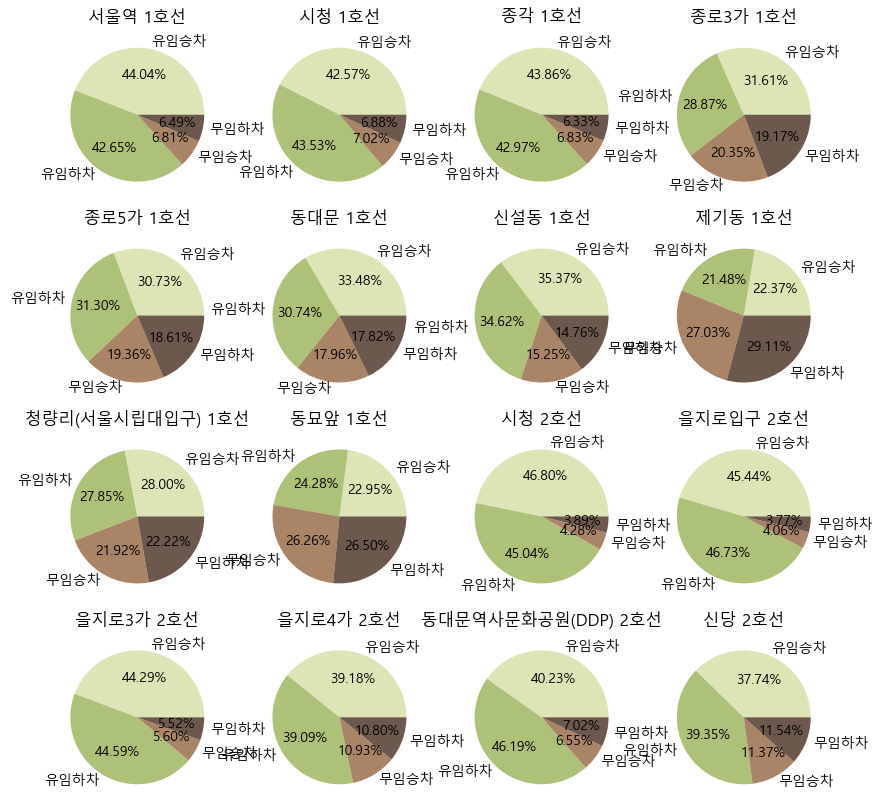

In [148]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
plt.rcParams['axes.unicode_minus']=False 

my_colours = ["#dde5b6", "#adc178", "#a98467", "#6c584c"]
label = ['유임승차','유임하차','무임승차','무임하차']

plt.figure(figsize=(10,10))

for i,row in enumerate(df.values):

    plt.subplot(4, 4, i+1) 

    plt.pie(row[4:8], labels=label, autopct='%.2f%%',colors=my_colours ) # 유무임 승하차 비율 슬라이싱
    plt.title(f'{row[3]} {row[1]}')
    # plt.legend(label)

    if i ==15: break #  16개 출력

plt.show()

In [ ]:
# https://benn.tistory.com/36

In [ ]:
# 전체제목과 범례를 올리는건 어떻게 해야할까?